In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

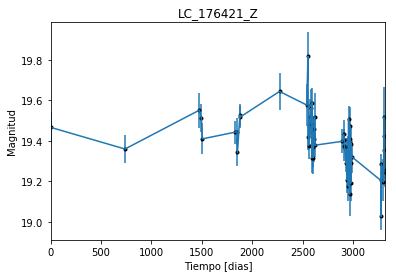

In [2]:
data = np.genfromtxt('LC_176421_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_176421_Z')
plt.savefig("LC_176421_Z.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

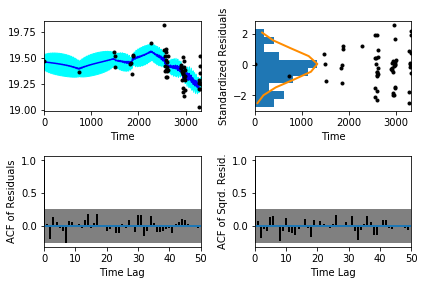

In [5]:
sample.assess_fit()

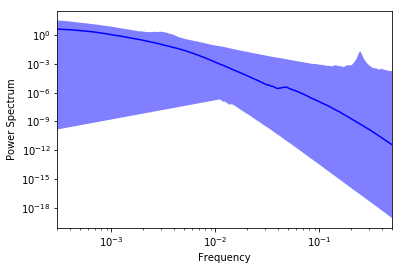

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

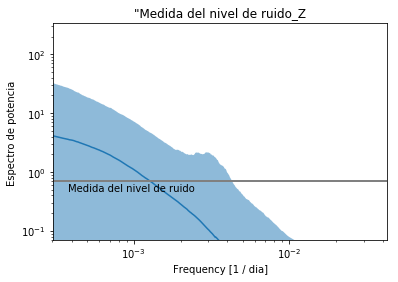

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_176421_Z')
plt.title('"Medida del nivel de ruido_Z')
plt.savefig("Medida del nivel de ruido_Z.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_176421_Z')

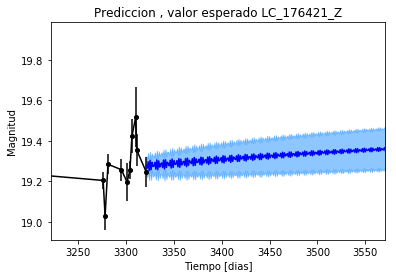

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_176421_Z')

Text(0.5,1,'Prediccion, Caminos simulados  LC_176421_Z')

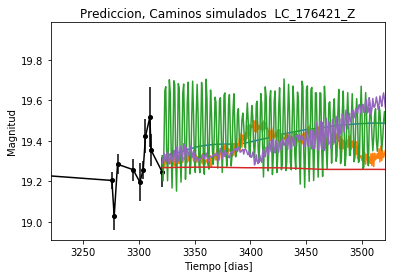

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_176421_Z')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


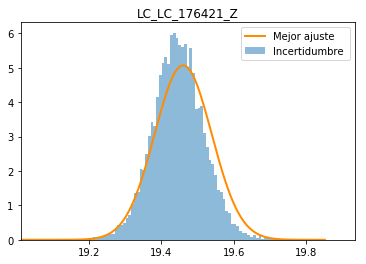

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_LC_176421_Z')
plt.savefig("Mejor_ajuste_LC_176421_Z.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_176421_Z')

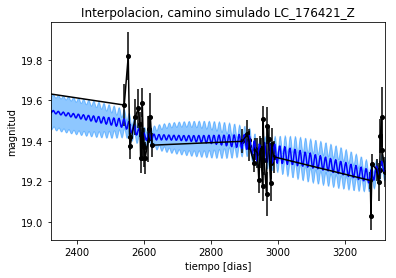

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_176421_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_176421_Z')

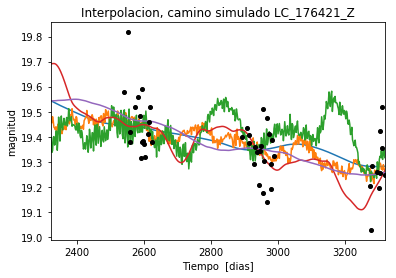

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_176421_Z')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 675.234330007
Median: 0.00514494690626
Standard deviation: 0.172117066154
68% credibility interval: [ 0.00052243  0.13384339]
95% credibility interval: [  3.43797861e-04   6.97535766e-01]
99% credibility interval: [  3.08678987e-04   9.35454224e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 1191.90807582
Median: 0.00133484859677
Standard deviation: 0.0620765816412
68% credibility interval: [ 0.00046087  0.01656784]
95% credibility interval: [ 0.00032285  0.17773518]
99% credibility interval: [  3.04709432e-04   4.32879480e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 996.369609786
Median: 0.0113644138015
Standard

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 2093.05241315
Median: 71.5749753947
Standard deviation: 1.4875647439
68% credibility interval: [ 69.84010414  72.50369317]
95% credibility interval: [ 67.47611185  73.12883481]
99% credibility interval: [ 65.36959404  73.67540843]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 752.109168259
Median: 0.420954988534
Standard deviation: 1.88070828634
68% credibility interval: [ 0.06356065  3.03566094]
95% credibility interval: [ 0.014288    6.33802902]
99% credibility interval: [ 0.00950925  9.08432506]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 76.5290296465
Median: 0.512661278013
Standard deviation: 13.6019212369
68% credibility interval: [  1.14561545e-02   1.84313503e+01]
95% credibility interval: [  4.4

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 936.286883985
Median: 1.88887127876e-42
Standard deviation: 6.44962674122e+90
68% credibility interval: [  2.01619813e-104   3.85969823e+033]
95% credibility interval: [  9.33117828e-147   1.34436226e+059]
99% credibility interval: [  5.25474798e-153   2.13958712e+079]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1906.73797384
Median: 19.417973543
Standard deviation: 0.0562688649897
68% credibility interval: [ 19.36943264  19.45923851]
95% credibility interval: [ 19.30355717  19.52879288]
99% credibility interval: [ 19.23488001  19.59682352]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 85.4843292409
Median: 0.0107436807375
Standard deviation: 0.340942947971
68% credibility interval: [ 0.          0.62311093]
95% credibility interval: [ 0.          1.00066221]
99% credibility interval: [ 0.          1.00256106]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 85.4843292409
Median: 0.0107436807375
Standard deviation: 0.340942947971
68% credibility interval: [ 0.          0.62311093]
95% credibility interval: [ 0.          1.00066221]
99% credibility interval: [ 0.          1.00256106]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 56.5650188796
Median: 0.0
Standard deviation: 0.0746188713191
68% cred

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 2093.05241315
Median: 71.5749753947
Standard deviation: 1.4875647439
68% credibility interval: [ 69.84010414  72.50369317]
95% credibility interval: [ 67.47611185  73.12883481]
99% credibility interval: [ 65.36959404  73.67540843]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1894.19771149
Median: 0.0123195072011
Standard deviation: 0.0166537664213
68% credibility interval: [ 0.00608343  0.02427006]
95% credibility interval: [ 0.00334442  0.0565657 ]
99% credibility interval: [ 0.00224022  0.10152309]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 134.563800379
Median: 1.34242709176
Standard deviation: 0.24919824234
68% credibility interval: [ 1.12427162  1.56808701]
95% credibility interval: [ 0.79002654  1.8063391 ]
99% credibility interval: [ 0.79002654  1.92896995]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 1629.07631691
Median: 8.15144154875e-06
Standard deviation: 0.110811471579
68% credibility interval: [  1.10408812e-34   2.06967842e-03]
95% credibility interval: [  1.02257817e-60   1.39835960e-01]
99% credibility interval: [  5.31684223e-76   6.24935317e-01]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 675.234330007
Median: (-0.0323266548076-0.110679260572j)
Standard deviation: 2.39970285542
68% credibility interval: [-0.84096284-3.74326734j -0.00328250+0.j        ]
95% credibility interval: [ -4.38274648e+00+0.j         -2.16014567e-03-0.8280955j]
99% credibility interval: [ -5.87763224e+00+0.j          -1.93948728e-03-0.00474634j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 1191.90807582
Median: (-0.00838710109051+1.72349071557j)
Standard deviation: 2.17742602213
68% credibility interval: [-0.10409881+0.20546153j -0.00289574+6.28734608j]
95% credibility interval: [-1.11674306 +1.50142837e+00j -0.00202854 +1.58116369e-04j]
99% credibility interval: [ -2.71986199e+00+2.80221936j  -1.91454583e-03+0.33335663j]
Post